In [1]:
import numpy as np
from scipy import misc
from matplotlib import pylab as plt
import matplotlib.cm as cm
%matplotlib inline

In [2]:
#1b load the training set into matrix X
train_labels, train_data = [], []
for line in open('./faces/train.txt'):
    im = misc.imread(line.strip().split()[0])
    train_data.append(im.reshape(2500,))
    train_labels.append(line.strip().split()[1])
train_data, train_labels = np.array(train_data, dtype=float), np.array(train_labels, dtype=int)

(540, 2500) (540,)


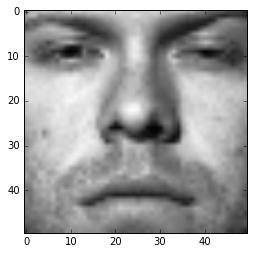

In [3]:
print(train_data.shape, train_labels.shape)
plt.imshow(train_data[10, :].reshape(50,50), cmap = cm.Greys_r)
plt.show()

In [4]:
#1C "Average Face" Computation
#calculate a face from the mean
mean = np.sum(train_data, axis=0) / train_data.shape[0]

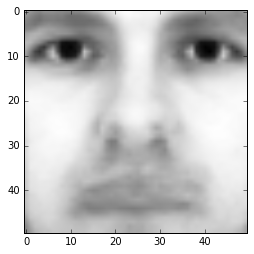

In [6]:
#1C "Average Face" Computation
#show the face with matplotlib
plt.imshow(mean.reshape(50,50),cmap = cm.Greys_r)
plt.show()
plt.imsave("averageFace.jpeg", mean.reshape(50,50), cmap=cm.Greys_r)

In [5]:
#1D Mean Subtraction
for i in range(train_data.shape[0]):
    train_data[i] = train_data[i] - mean

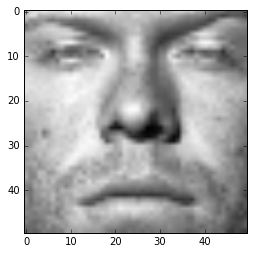

In [6]:
plt.imshow(train_data[10,:].reshape(50,50),cmap=cm.Greys_r)

In [7]:
#1E Eigenface
#http://docs.scipy.org/doc/numpy/reference/generated/numpy.linalg.svd.html
U, s, V = np.linalg.svd(train_data)

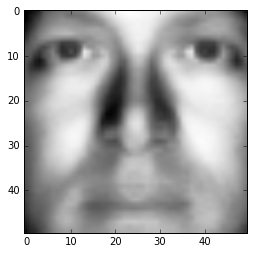

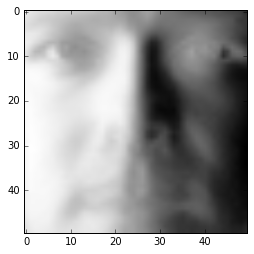

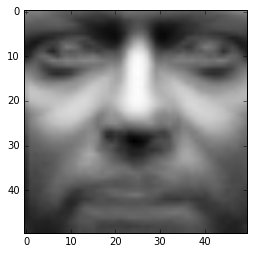

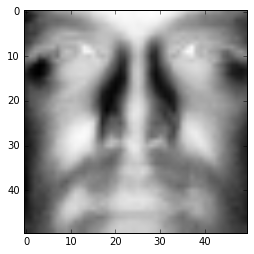

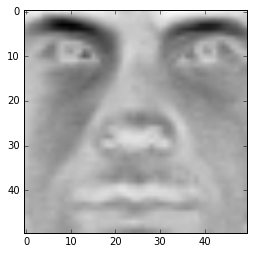

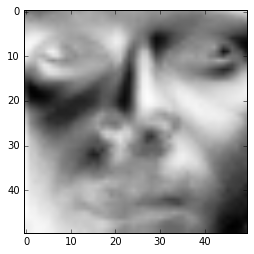

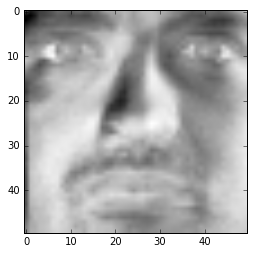

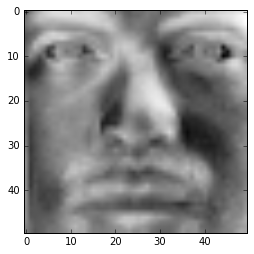

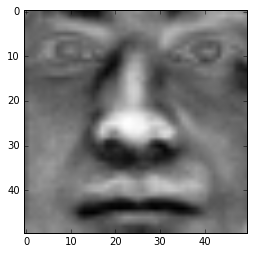

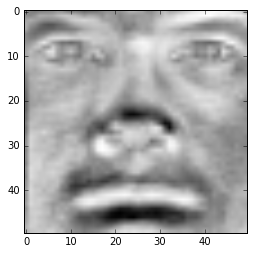

In [8]:
for i in range (0,10):
    fig=plt.figure()
    plt.imshow(V[i,:].reshape(50,50),cmap=cm.Greys_r)

In [39]:
#this function creates matrix S that contains the singular values from vector s on its diagonal
def create_S(U,s,V):
    S=np.zeros((len(U),len(V)), dtype=complex)
    for i in range(len(S)):
        S[i,i]=s[i]
    return S

In [40]:
S=create_S(U,s,V)

In [41]:
#this function takes as input the singular value decomposition matrix X 
#and it generates an approximation Xr with rank r
def calculate_Xr(U,S,V,r):
    Xr=[]
    Xr=np.dot(U[:,:r],np.dot(S[:r,:r],V[:r,:]))
    return Xr

In [42]:
#1f -- this function takes in the training data, matrices U,S,V and rank 
#      it returns the rank-r approx error and a list of r values
def rank_r_approx_error(X,U,S,V,r):
    approx_error=[]
    r_list=[]
    #iterating through the rank options between 1-200, we calculate the Frobeuis Norm of ||X-Xr||
    # we append the error differences to approx_error and the list of ranks to r_list
    for i in range(0,r+1):
        Xr=calculate_Xr(U,S,V,i)
        difference_mat=X-Xr
        approx_error.append(np.linalg.norm(difference_mat))
        r_list.append(i)
    return approx_error, r_list

In [44]:
#1f-cont. -- this function plots r against the approximation error
def plot_rank_r (approx_error,r):
    plt.xlabel("r")
    plt.ylabel("Frobeius Norm of approximation error")
    plt.plot(r_list,approx_error)
    plt.show()

In [46]:
#we create the list of appoximated values, and list of r, which represents the different rank options
approx_list, r_list =rank_r_approx_error(train_data,U,S,V,200)

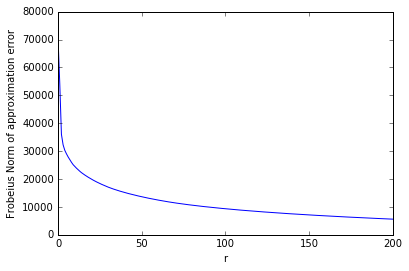

In [47]:
#1f plot the rank-r approximation
plot_rank_r(approx_list,r_list)

In [10]:
#importing and saving the test dataset and labels
test_data=[]
test_labels=[]
for line in open('./faces/test.txt'):
    im = misc.imread(line.strip().split()[0])
    test_data.append(im.reshape(2500,))
    test_labels.append(line.strip().split()[1])
test_data, test_labels = np.array(test_data, dtype=float), np.array(test_labels, dtype=int)

In [60]:
def get_F(X_train,X_test,V,r):
    Vt=np.transpose(V[:r])
    F=np.dot(X_train,Vt)
    F_test=np.dot(X_test,Vt)
    return F,F_test

In [61]:
F, F_test=get_F(train_data, test_data, V, 10)

In [63]:
print (F.shape, F_test.shape)

(540, 10) (100, 10)


In [12]:
from sklearn.linear_model import LogisticRegression
def get_accuracy(X_train, X_test, V, r):
    F,F_test=get_F(X_train,X_test,V,r)
    lrc=LogisticRegression()
    lrc.fit(F,train_labels)
    score=lrc.score(F_test,test_labels)
    return score

In [65]:
def plot_feature_classification (X_train, X_test, V, r):
    accuracy_list=[]
    r_list=[]
    plt.xlabel("r")
    plt.ylabel("classification accuracy")
    for i in range (1,r+1):
        accuracy_list.append(get_accuracy(X_train, X_test, V, i))
        r_list.append(i)
    plt.scatter(r_list, accuracy_list)
    plt.show()

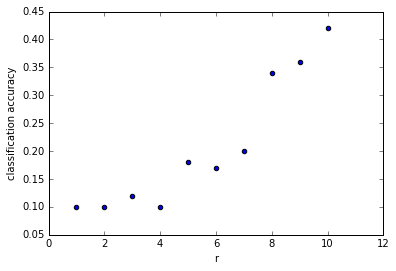

In [66]:
plot_feature_classification (train_data, test_data, V, 10)